Importing the required packages

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature # This pacakge is used for LBP feature extraction
from sklearn import svm # This pacakge is used for svm classification
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline
import cv2
import seaborn as sns # This pacakge is used for better visualization of data (e.g confusion matrix)

Loading the **dataset**

In [22]:
import os
from os.path import isfile, join
import re

mypath = 'dataset_42028assg1_13918471'
categories = ['!', ')', '[', '+', '=', 'cos', 'div', 'sum', 'tan', 'times']
dataset = []
img_index_arr = []
# files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

def load_data():
    for category in categories:
        path = os.path.join(mypath, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img),0)
                new_array = cv2.resize(img_array, (40,40))
                dataset.append(new_array)
                img_index_arr.append(class_num)
            except Exception as e:
                print(e)


In [23]:
load_data()

Displaying examples from the dataset

!
)
+
sum


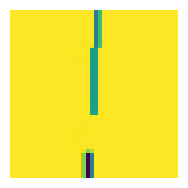

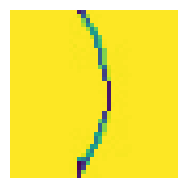

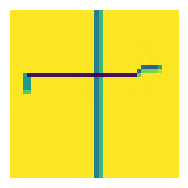

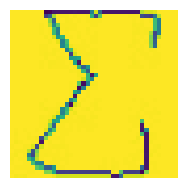

In [24]:
datasetArr = np.array(dataset)

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.axis('off')
ax1.imshow(dataset[0])
print(categories[img_index_arr[0]])

fig = plt.figure()
ax1 = fig.add_subplot(2,2,2)
ax1.axis('off')
ax1.imshow(dataset[500])
print(categories[img_index_arr[500]])

fig = plt.figure()
ax1 = fig.add_subplot(2,2,3)
ax1.axis('off')
ax1.imshow(dataset[1500])
print(categories[img_index_arr[1500]])

fig = plt.figure()
ax1 = fig.add_subplot(2,2,4)
ax1.axis('off')
ax1.imshow(dataset[3500])
print(categories[img_index_arr[3500]])


Splitting the dataset into training and testing sets

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(datasetArr, img_index_arr)

In [26]:
print("Extracting features from training dataset...")
data_train = []
labels_train = []

# loop over the training images
for img_index in range(len(X_train)):
  # load the image, and extract HOG features
  image = (X_train[img_index])
  #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  H = feature.hog(image, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")

  # update the data and labels
  data_train.append(H)
  labels_train.append(Y_train[img_index])

print(np.shape(data_train))
print(np.shape(labels_train))

Extracting features from training dataset...
(3750, 324)
(3750,)


In [27]:
# train a SVM clasifier on the training data
# Initialize the SVM model
model = svm.SVC(kernel='rbf',C=100.0, random_state=42) # rbf Kernel
# Start training the SVM classifier
model.fit(data_train, labels_train)

print(np.shape(data_train))
print(np.shape(labels_train))

(3750, 324)
(3750,)


In [28]:
# Check the training accuray
print("Train set Accuracy: {:.2f}".format(model.score(data_train,labels_train)))

# Expected training set Accuracy 0.60

Train set Accuracy: 1.00


In [29]:
# initialize the data matrix and labels
print("Extracting features from test dataset...")
predict_test = []
labels_test = []
data_test=[]
# loop over the training images
for img_ind in range(len(X_test)):
  # load the image, and extract HOG features
  img=X_test[img_ind]
  H = feature.hog(img, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  pred = model.predict(H.reshape(1, -1))[0]
  # update the data and labels
  predict_test.append(pred)
  data_test.append(H)

  labels_test.append(Y_test[img_ind])

print(np.shape(predict_test))
print(np.shape(labels_test))

Extracting features from test dataset...
(1250,)
(1250,)


In [30]:
# Test set Accuracy
accuracy = metrics.accuracy_score(Y_test, predict_test)
print("Accuracy on test dataset:",accuracy)
# Expected test Accuracy 0.75

Accuracy on test dataset: 0.9968


[[120   0   0   0   0   0   0   0   0   0]
 [  0 130   0   0   0   0   0   0   0   0]
 [  0   0 120   0   0   0   0   0   0   0]
 [  0   0   0 124   0   0   0   0   0   0]
 [  0   0   0   0 139   0   1   0   0   0]
 [  0   0   0   0   0 119   0   0   1   0]
 [  0   1   0   0   0   0 121   0   0   0]
 [  0   0   0   0   0   0   0 130   0   0]
 [  0   0   0   0   0   0   0   0 131   0]
 [  0   0   0   1   0   0   0   0   0 112]]


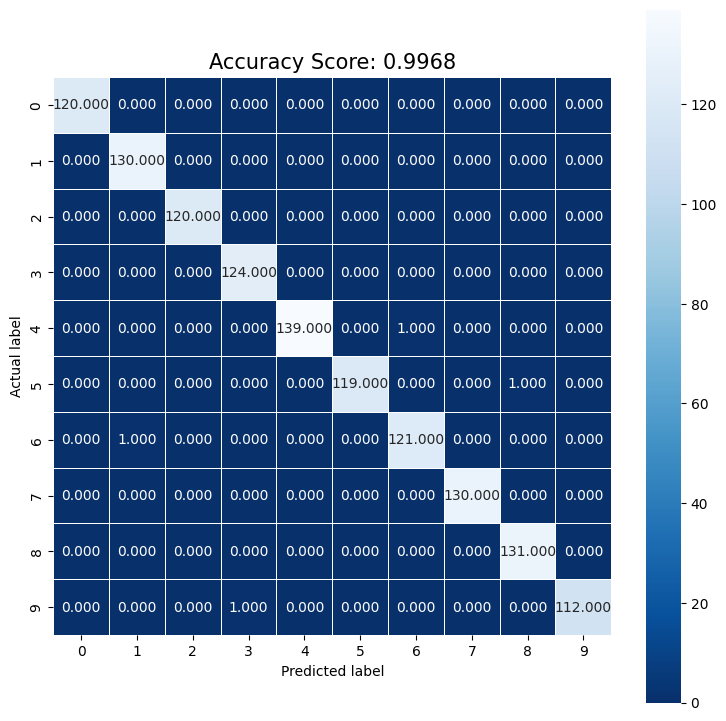

In [31]:
# plot the confusion matrix
cm  = metrics.confusion_matrix(Y_test, predict_test)
print(cm)

# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [32]:
images = []
orig_labels=[]
# randomly select a few testing fashion items
for i in np.random.choice(np.arange(0, len(Y_test)), size=(16,)):
  # classify the clothing
  test_img = (X_test[i])
  H1 = feature.hog(test_img, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  pred = model.predict(H1.reshape(1, -1))[0]
  #prediction = model.predict(test_img.reshape(1, -1))
  label = categories[pred]
  orig_labels.append(categories[Y_test[i]])
  color = (0, 255, 0)
  test_img = cv2.merge([test_img] * 3)
  test_img = cv2.resize(test_img, (96, 96), interpolation=cv2.INTER_LINEAR)
  cv2.putText(test_img, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50, color, 2)
  images.append(test_img)

In [33]:
orig_labels[1]

'='

=
cos
!
[


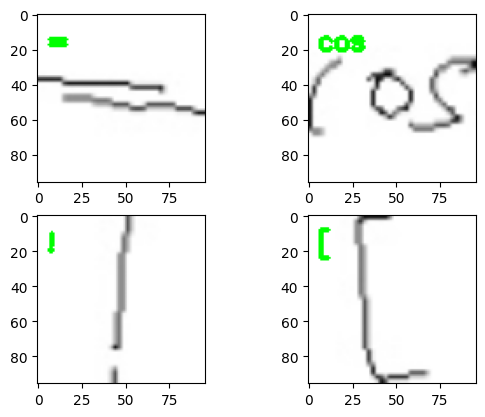

In [34]:
## Display the classification results
#Plot the image and the predicted labels
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(images[1])
print(orig_labels[1])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(images[2])
print(orig_labels[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(images[3])
print(orig_labels[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(images[4])
print(orig_labels[4])